# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [5]:
df=data[['race','call']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 2 columns):
race    4870 non-null object
call    4870 non-null float32
dtypes: float32(1), object(1)
memory usage: 95.1+ KB


In [6]:
df.race.unique()

array(['w', 'b'], dtype=object)

In [7]:
df.call.unique()

array([0., 1.])

In [8]:
# number of white-sounding name rows
sum(df['race']=='w')

2435

In [9]:
# number of black-sounding name rows
sum(df['race']=='b')

2435

In [10]:
# number of callbacks for white-sounding names
sum(df[df.race=='w'].call)

235.0

In [11]:
# number of callbacks for black-sounding names
sum(df[df.race=='b'].call)

157.0

1. What test is appropriate for this problem? Does CLT apply?
   
CLT applies. This is a binary response problem which follows Bernoulli distribution. However, the difference of "percentage callback" between two races will follow a normal distribution. Hypothesis test and t-statistics test are appropriate for this problem.

2. What are the null and alternate hypotheses?

Null hypothesis is there is no difference on "percentage callback" between two races. Alternate hypothesis is there is significant difference on "percentage callback" between two races.


In [12]:
w = data[data.race=='w']
b = data[data.race=='b']

3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

3.1 t-test

In [13]:
pw=sum(df[df.race=='w'].call)/sum(df['race']=='w')
pb=sum(df[df.race=='b'].call)/sum(df['race']=='b')
mean=pw-pb

var_w=pw*(1-pw)/sum(df['race']=='w')
var_b=pb*(1-pb)/sum(df['race']=='b')

var=var_w+var_b

# margin of error
moe=1.96*np.sqrt(var)
print(moe)

0.015255406349886438


In [14]:
# confidence interval
print([mean-moe,mean+moe])

[0.016777447859559147, 0.047288260559332024]


In [18]:
# p-value
t_val=(0-mean)/np.sqrt(var)
p_value = stats.t.sf(np.abs(t_val), 2435-1)*2
print(p_value)

3.991074585679982e-05


3.2 bootstrap permutation test

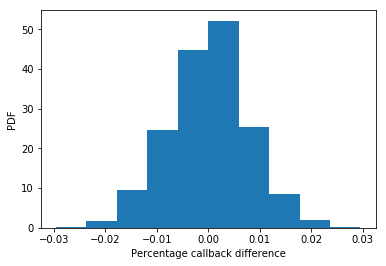

In [42]:
import matplotlib.pyplot as plt
def permutation_replicate(data1,data2,func):
    both=np.concatenate((data1,data2))
    perm=np.random.permutation(both)
    perm_1=perm[:len(data1)]
    perm_2=perm[len(data1):]
    return func(perm_1,perm_2)
    
def diff_frac(data1,data2):
    frac_1=np.sum(data1)/len(data1)
    frac_2=np.sum(data2)/len(data2)
    return frac_1-frac_2

perm_replicates=np.empty(10000)

for i in range(10000):
    perm_replicates[i]=permutation_replicate(df[df.race=='w'].call,df[df.race=='b'].call,diff_frac)
    
_=plt.hist(perm_replicates,density=True)
_=plt.xlabel('Percentage callback difference')
_=plt.ylabel('PDF')

In [46]:
p_value=(np.sum(perm_replicates>=mean)+np.sum(perm_replicates<=-mean))/len(perm_replicates)
print(p_value)

0.0


4. Write a story describing the statistical significance in the context or the original problem.

Assuming null hypothesis is there is no difference on percentage callback between two races. Based on t-test, the p-value of is 3.991074585679982e-05, less than 5%. Based on permutation test, the p-value is 0. Both of these approches reach the same conclusion, null hypothesis should be rejected. There is difference on percentage callback between two races.

5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

My analysis doesn't mean race/name is the most important factor in callback success. It's only one of the factors that will affect callback success. To rank different factors, we need to evaluate correlation between each factor and callback success.